# Exploring ODF Extraction
## Sam Potter
## Current: 3/21/19

## Path and Imports

In [1]:
import sys
import os

sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\BitBucket\dic',
                 'C:/Users/potterst1/Desktop/Repositories/BitBucket/dic'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/dic'])
from dic import visualize
from dic import fileIO
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches
from matplotlib import rc
from dic import utilities
import seaborn as sns

from ipywidgets import *
from scipy import optimize as sciopt

## Magics

In [2]:
%matplotlib inline

## Optical Mathematics

### Cylindrical scattering for single fiber

$I_{fiber}(\theta) = a_0 + a_2 \cos(2(\theta - \phi)) + a_4 \cos(4(\theta - \phi))$

### Cylindrical scattering for a distribution of fibers

$I_{dist}(\theta) = \int_{-\pi/2}^{\pi/2} I_{fiber}(\theta) PDF_{dist}(\theta) d \theta$

NOTE, CONVOLUTION OPERATION IS TREATED AS JUST SUMMATION AND NORMALIZATION IN THE WORK BELOW. CORRECT???

## Setup Single Fiber Cosine Series

### Definition of single fiber function

In [3]:
def Ifiber(a0, a2, a4, phi, numpts=100, normalize=True):
    
    theta = np.linspace(-90, 90, numpts)
    
    vals = a0 + a2 * np.cos(np.deg2rad(2 * (theta - phi))) + a4 * np.cos(np.deg2rad(4 * (theta - phi)))
    
    if normalize:
        vals = utilities.normalize_1d(vals)
    
    return vals, theta

In [4]:
def Ifiber_interactive(a0, a2, a4, phi, numpts=100, normalize=True):
    
    theta = np.linspace(-90, 90, numpts)
    
    vals = a0 + a2 * np.cos(np.deg2rad(2 * (theta - phi))) + a4 * np.cos(np.deg2rad(4 * (theta - phi)))
    
    if normalize:
        vals = utilities.normalize_1d(vals)
    
    fig = plt.figure(figsize=(10, 10))
    plt.plot(theta, vals, color='g', label='Intensity');
    plt.legend(prop={'size': 18});
    plt.xlabel(r'$\theta$', fontsize=18);
    plt.ylabel('Normalized Intensity (a.u.)', fontsize=18);
    plt.title('Normalized Intensity Curves of Single Fiber under Cylindrical Scattering', fontsize=18);
    plt.autoscale(enable=True, axis='x', tight=True)
    
    print('a2/a4: {}'.format(a2/a4))

### Plot a sample intensity function

In [5]:
p = interactive(Ifiber_interactive, a0=(0, 1, 0.1), a2=(0, 0.05, 0.005), a4=(0, 0.2, 0.02), phi=(-90, 90, 5), numpts=(100, 500, 10))
display(p)

interactive(children=(FloatSlider(value=0.0, description='a0', max=1.0), FloatSlider(value=0.025, description=…

In [6]:
Ifiber1, thetaval1 = Ifiber(0, 0.025, 0.10, 0, normalize=False)
Ifiber2, thetaval2 = Ifiber(0, 0.025, 0.10, 45, normalize=False)
Ifiber3, thetaval3 = Ifiber(0, 0.035, 0.10, -45, normalize=False)
Isum = Ifiber1 + Ifiber2 + Ifiber3
Isum_normed = utilities.normalize_1d(Isum)

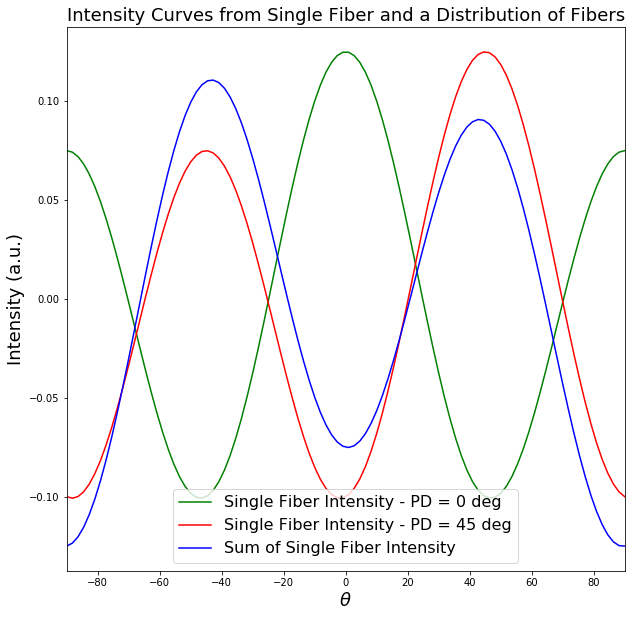

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.plot(thetaval1, Ifiber1, color='g', label='Single Fiber Intensity - PD = 0 deg');
plt.plot(thetaval2, Ifiber2, color='r', label='Single Fiber Intensity - PD = 45 deg');
plt.plot(thetaval2, Isum, color='b', label='Sum of Single Fiber Intensity')
#plt.plot(thetaval2, Isum_normed, color='k', label='Normalized Sum of Single Fiber Intensity')
plt.legend(prop={'size': 16}, loc='best');
plt.xlabel(r'$\theta$', fontsize=18);
plt.ylabel('Intensity (a.u.)', fontsize=18);
plt.title('Intensity Curves from Single Fiber and a Distribution of Fibers', fontsize=18);
#plt.ylim(0, 1.25)
plt.autoscale(enable=True, axis='x', tight=True)

## Setup Uniform Distribution

In [8]:
samples = np.random.uniform(-45, 45, 10000)

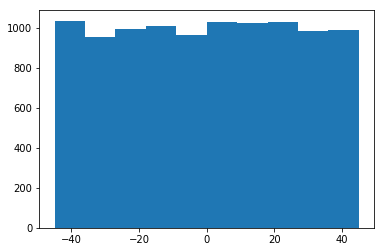

In [9]:
plt.hist(samples);

## Setup Normal Distribution

In [10]:
samples = np.random.normal(0, 45, 10000)

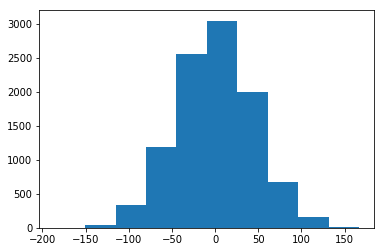

In [11]:
plt.hist(samples);

### Setup and generate samples

In [12]:
def syntheticIdist(a0, a2, a4, splay, nsamples, distribution='uniform'):
    
    ntheta = 100
    Idist = np.zeros((nsamples, ntheta))
    for i in range(0, nsamples):
        if distribution == 'uniform':
            phi = np.random.uniform(-1*splay, splay)
        elif distribution == 'normal':
            phi = np.random.normal(0, splay)

        vals, theta_dist = Ifiber(a0, a2, a4, phi, numpts=ntheta, normalize=False)
        Idist[i, :] = vals

    Idist = np.sum(Idist, axis=0) / nsamples
    #Idist = utilities.normalize_1d(Idist)
    
    return Idist

In [13]:
def compareI(a0, a2, a4, phi0, splay, nsamples, distribution='uniform'):
    
    ntheta = 100
    Idist = np.zeros((nsamples, ntheta))
    if distribution == 'uniform':
        phis = np.random.uniform(-1*splay, splay, nsamples)
    elif distribution == 'normal':
        phis = np.random.normal(0, splay, nsamples)
    for i in range(0, nsamples):
        phi = phis[i]
        vals, theta_dist = Ifiber(a0, a2, a4, phi, numpts=ntheta, normalize=False)
        Idist[i, :] = vals

    Idist = np.sum(Idist, axis=0) / nsamples
    #Idist = utilities.normalize_1d(Idist)
    
    Ifibers, theta_fiber = Ifiber(a0, a2, a4, phi0, numpts=ntheta, normalize=False)
    
    fig = plt.figure(figsize=(10, 10))
    plt.plot(theta_fiber, Ifibers, color='g', label='Single Fiber Intensity');
    plt.plot(theta_dist, Idist, color='r', label='Fiber Distribution Intensity');
    plt.legend(prop={'size': 14}, loc='best');
    plt.xlabel(r'$\theta$', fontsize=18);
    plt.ylabel('Intensity (a.u.)', fontsize=18);
    plt.title('Intensity Curves from Single Fiber and a Distribution of Fibers', fontsize=18);
    #plt.ylim(0, 1.25)
    plt.autoscale(enable=True, axis='x', tight=True)
    
    fig = plt.figure(figsize=(10, 10))
    plt.hist(phis)
    plt.title('Historgram of phi')
    plt.xlabel('phi')
    

In [14]:
p = interactive(compareI, a0=(0, 1, 0.1), a2=(0, 0.05, 0.005), a4=(0, 0.2, 0.02), phi0=(-90, 90, 5), splay=(0, 90, 5), nsamples=(10, 10000, 100))
display(p)

interactive(children=(FloatSlider(value=0.0, description='a0', max=1.0), FloatSlider(value=0.025, description=…

## See if I can fit the new a0, a2, and a4 terms from the Idist

In [15]:
def minimand(a0, a2, a4, phi, data):
    
    theta = np.linspace(-90, 90, len(data))
    
    feval = a0 + a2 * np.cos(np.deg2rad(2 * (theta - phi))) + a4 * np.cos(np.deg2rad(4 * (theta - phi)))
    
    diff = data - feval
    
    diffsq = np.square(diff, diff)
    
    ssd = np.sum(diffsq)
    
    return ssd

In [16]:
def minfun(params, *args):

    return minimand(params[0], params[1], params[2], params[3], *args)

In [17]:
a0 = 0
a2 = 0.0652
a4 = 0.2489
phi = 0
splay = 30
nsamples = 10000
Isingle_data, theta_single = Ifiber(a0, a2, a4, phi, normalize=False)
Idist_data = syntheticIdist(a0, a2, a4, splay, nsamples, distribution='normal')
minimand(a0, a2, a4, phi, Idist_data)

2.4069838314618552

## Find the distribution terms

### Plot the data first

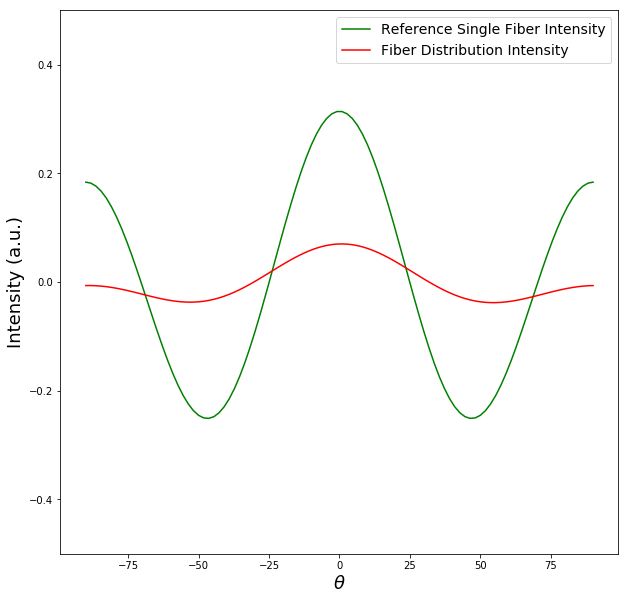

In [18]:
theta = np.linspace(-90, 90, 100)
fig = plt.figure(figsize=(10, 10))
plt.plot(theta, Isingle_data, color='g', label='Reference Single Fiber Intensity')
plt.plot(theta, Idist_data, color='r', label='Fiber Distribution Intensity');
plt.legend(prop={'size': 14}, loc='best');
plt.xlabel(r'$\theta$', fontsize=18);
plt.ylabel('Intensity (a.u.)', fontsize=18);
plt.ylim(-.5, .5);

### Minimize to find the parameter values

In [19]:
args_tup = (Idist_data)
int_x = np.array([.6, 0.025, .15, 0])
bounds = ((0, 1), (-1, 1), (0, 1), (-90, 90))
res = sciopt.minimize(minfun, int_x, args=args_tup, bounds=bounds, method='L-BFGS-B', jac='2-point')

In [20]:
print('Final values of a0, a2, a4, phi: {}'.format(res.x))
print('Final residual: {}'.format(res.fun))

Final values of a0, a2, a4, phi: [0.         0.03828102 0.03177773 0.75403043]
Final residual: 8.226085000601654e-06


### Plot fit results

In [21]:
a0f = res.x[0]
a2f = res.x[1]
a4f = res.x[2]
phif = res.x[3]

Ifit, theta_fit = Ifiber(a0f, a2f, a4f, phif, normalize=False)

Single Fiber a2: 0.0652, a4: 0.2489 and a2/a4: 0.26195259140216953
Fit Fiber Distribution a2: 0.038281023031274015, a4: 0.031777731908994016 and a2/a4: 1.2046493167260746


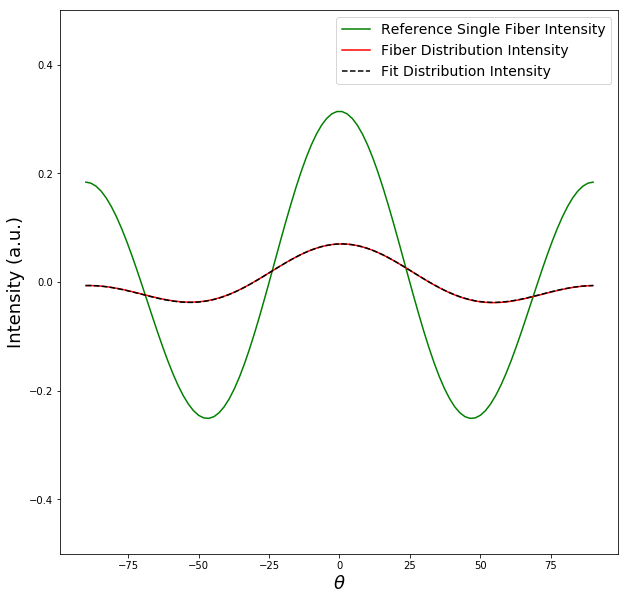

In [22]:
theta = np.linspace(-90, 90, 100)
fig = plt.figure(figsize=(10, 10))
plt.plot(theta, Isingle_data, color='g', label='Reference Single Fiber Intensity')
plt.plot(theta, Idist_data, color='r', label='Fiber Distribution Intensity');
plt.plot(theta, Ifit, color='k', ls='dashed', label='Fit Distribution Intensity')
plt.legend(prop={'size': 14}, loc='best');
plt.xlabel(r'$\theta$', fontsize=18);
plt.ylabel('Intensity (a.u.)', fontsize=18);
plt.ylim(-.5, .5);
print('Single Fiber a2: {}, a4: {} and a2/a4: {}'.format(a2, a4, a2/a4))
print('Fit Fiber Distribution a2: {}, a4: {} and a2/a4: {}'.format(a2f, a4f, a2f/a4f))

### Look at spread of possible a2/a4 combinations

In [23]:
a2s = np.linspace(-1, 1, 100)
a4s = np.linspace(0.01, 1, 100)

a44, a22 = np.meshgrid(a4s, a2s)

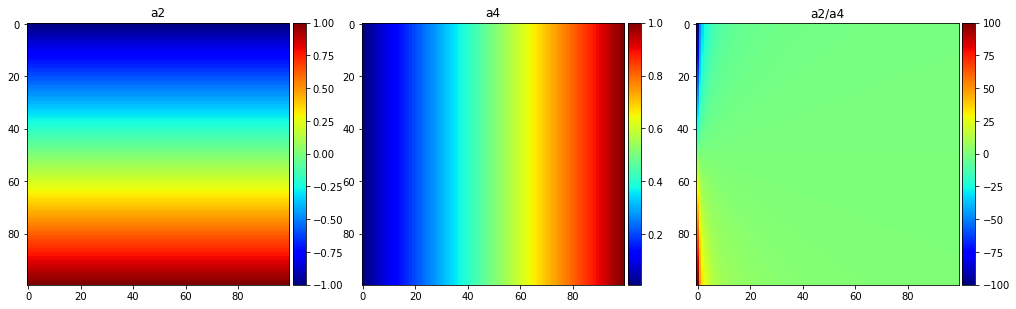

In [24]:
ratio = a22/a44

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(17, 17))
im0 = ax0.imshow(a22, cmap='jet')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0)
ax0.set_title('a2')

im1 = ax1.imshow(a44, cmap='jet')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1)
ax1.set_title('a4');

im2 = ax2.imshow(ratio, cmap='jet')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax2)
ax2.set_title('a2/a4');

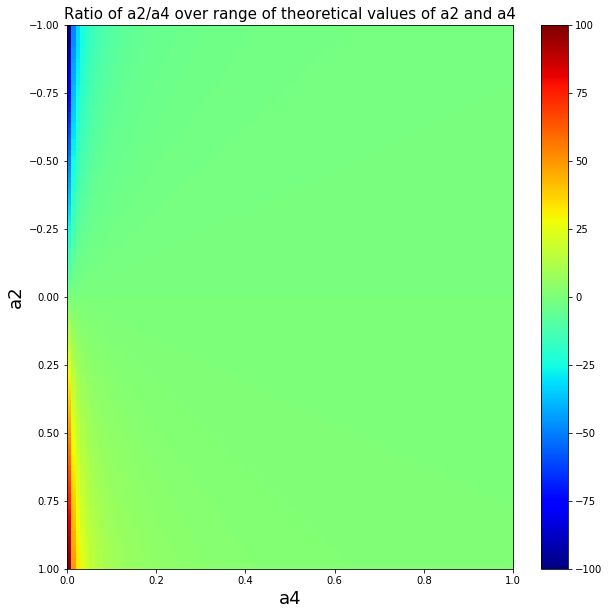

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(ratio, cmap='jet', extent=[0, 1, 1, -1], aspect='auto')
plt.colorbar();
plt.title('Ratio of a2/a4 over range of theoretical values of a2 and a4', size=15);
plt.xlabel('a4', size=18)
plt.ylabel('a2', size=18);

### Looking at 1D slices - Varying a4

In [26]:
a2 = np.linspace(-1, 1, 5)
a4 = np.linspace(0.01, 1, 100)

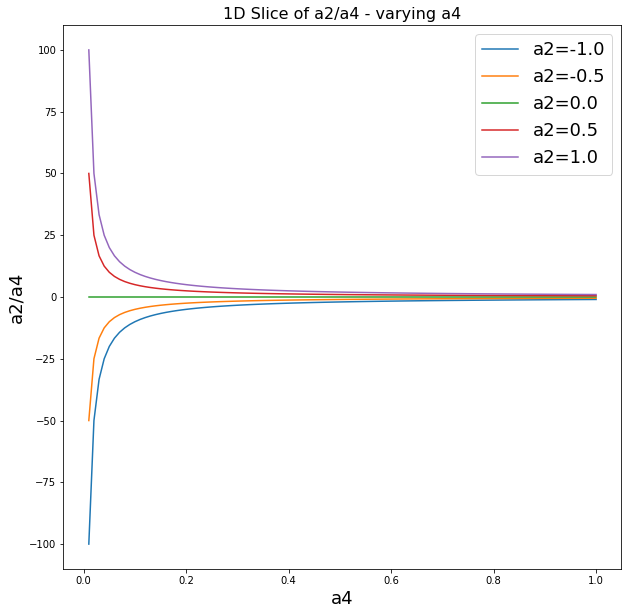

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.plot(a4, a2[0] / a4, label='a2={}'.format(a2[0]));
plt.plot(a4, a2[1] / a4, label='a2={}'.format(a2[1]))
plt.plot(a4, a2[2] / a4, label='a2={}'.format(a2[2]))
plt.plot(a4, a2[3] / a4, label='a2={}'.format(a2[3]))
plt.plot(a4, a2[4] / a4, label='a2={}'.format(a2[4]))
plt.legend(prop={'size': 18});
plt.xlabel('a4', size=18)
plt.ylabel('a2/a4', size=18)
plt.title('1D Slice of a2/a4 - varying a4', size=16);

### Looking at 1D slices - Varying a2

In [28]:
a2 = np.linspace(-1, 1, 100)
a4 = np.linspace(0.0, 1, 5)
print(a4)

[0.   0.25 0.5  0.75 1.  ]


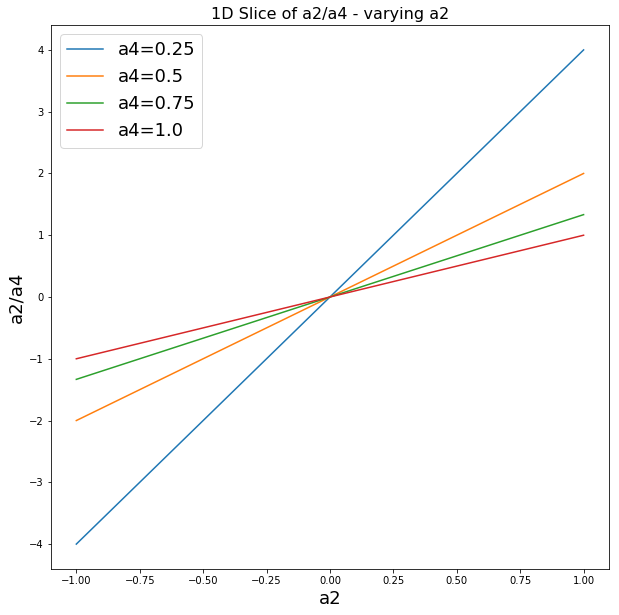

In [29]:
# Note leaving out the a4=0 as it leads to inf
fig = plt.figure(figsize=(10, 10))
plt.plot(a2, a2 / a4[1], label='a4={}'.format(a4[1]))
plt.plot(a2, a2 / a4[2], label='a4={}'.format(a4[2]))
plt.plot(a2, a2 / a4[3], label='a4={}'.format(a4[3]))
plt.plot(a2, a2 / a4[4], label='a4={}'.format(a4[4]))
plt.legend(prop={'size': 18});
plt.xlabel('a2', size=18)
plt.ylabel('a2/a4', size=18)
plt.title('1D Slice of a2/a4 - varying a2', size=16);

### Looking at 1D slices - Varying a4 - Looking at top 80% of a4 range

In [30]:
a2 = np.linspace(-1, 1, 5)
a4 = np.linspace(0.01, 1, 100)

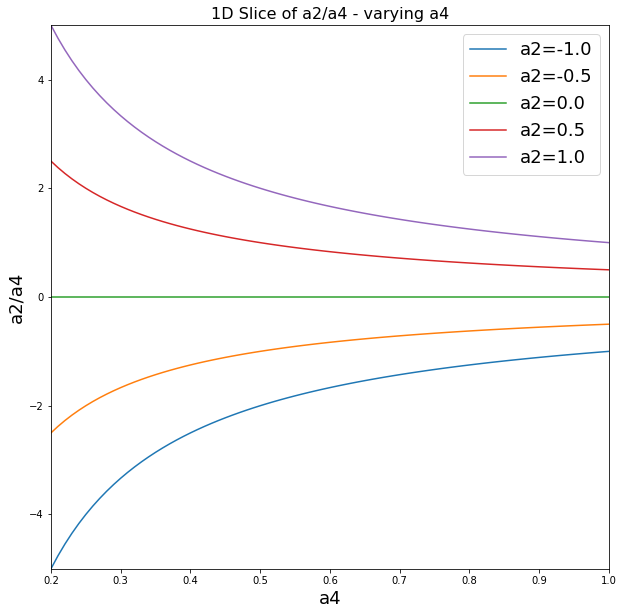

In [31]:
fig = plt.figure(figsize=(10, 10))
plt.plot(a4, a2[0] / a4, label='a2={}'.format(a2[0]));
plt.plot(a4, a2[1] / a4, label='a2={}'.format(a2[1]))
plt.plot(a4, a2[2] / a4, label='a2={}'.format(a2[2]))
plt.plot(a4, a2[3] / a4, label='a2={}'.format(a2[3]))
plt.plot(a4, a2[4] / a4, label='a2={}'.format(a2[4]))
plt.legend(prop={'size': 18});
plt.xlabel('a4', size=18)
plt.ylabel('a2/a4', size=18)
plt.xlim(0.2, 1.0)
plt.ylim(-5, 5)
plt.title('1D Slice of a2/a4 - varying a4', size=16);

### Histogram a2/a4

In [32]:
ratio_flat = np.ndarray.flatten(ratio)

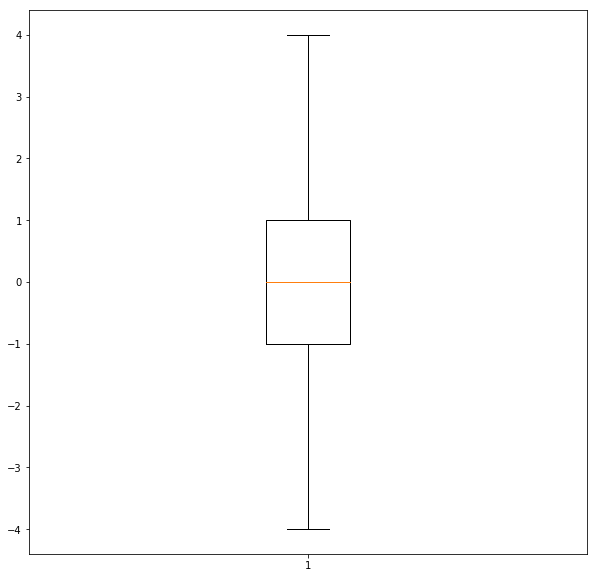

In [33]:
fig = plt.figure(figsize=(10, 10))
plt.boxplot(ratio_flat, showfliers=False);

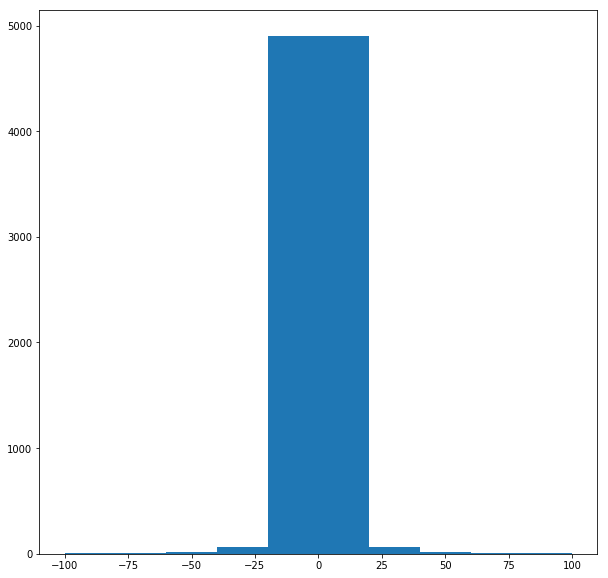

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.hist(ratio_flat);

### Effects of fiber population splay on a2/a4 ratios

Note, this doesn't really reflect range of a2/a4 from real single fiber types. Need to get that from the literature. This is just to scope.

SOMETHING SEEMS WRONG

In [35]:
# Specify range of a2/a4 to be [-4, 4]
# Accomplish this by fixing a4=0.25 and letting a2 range [-1, 1]
a2 = np.linspace(-1, 1, 20)
a4 = 0.25
a2a4 = a2 / a4

In [36]:
# Specify range of sigma
sigma = np.linspace(0, 90, 19)

In [37]:
# Loop over a2/a4
# Loop over splay
# Compute a2/a4 of a distribution, use a2 and a4 as a starting point
# Store this in th earray

phi = 0
a0 = 0
nsamples = 10000
bounds = ((0, 1), (-1, 1), (0, 1), (-90, 90))

a2a4_dist = np.zeros((len(a2/a4), len(sigma)))
residualmat = np.zeros((len(a2/a4), len(sigma)))
for i in range(0, len(a2a4)):
    for j in range(0, len(sigma)):
        a2 = a2a4[i] * a4
        # Generate a synthetic distribution
        Idist_data = syntheticIdist(a0, a2, a4, splay, nsamples, distribution='normal')
        # Fit that data
        args_tup = (Idist_data)
        int_x = np.array([a0, a2, a4, phi])
        minresult = sciopt.minimize(minfun, int_x, args=args_tup, bounds=bounds, method='L-BFGS-B', jac='2-point')
        a0f = minresult.x[0]
        a2f = minresult.x[1]
        a4f = minresult.x[2]
        phif = minresult.x[3]
        residual = minresult.fun
        a2a4f = a2f/a4f
        
        a2a4_dist[i, j] = a2a4f
        residualmat[i, j] = residual

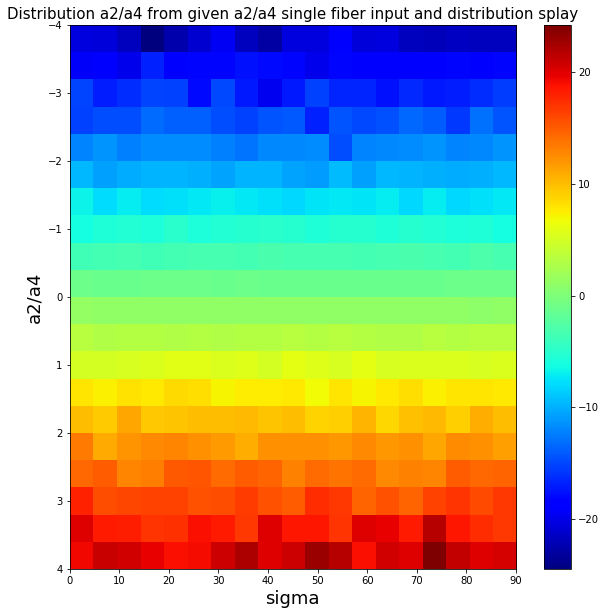

In [38]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(a2a4_dist, cmap='jet', extent=[0, 90, 4, -4], aspect='auto')
plt.colorbar();
plt.title('Distribution a2/a4 from given a2/a4 single fiber input and distribution splay', size=15);
plt.xlabel('sigma', size=18)
plt.ylabel('a2/a4', size=18);

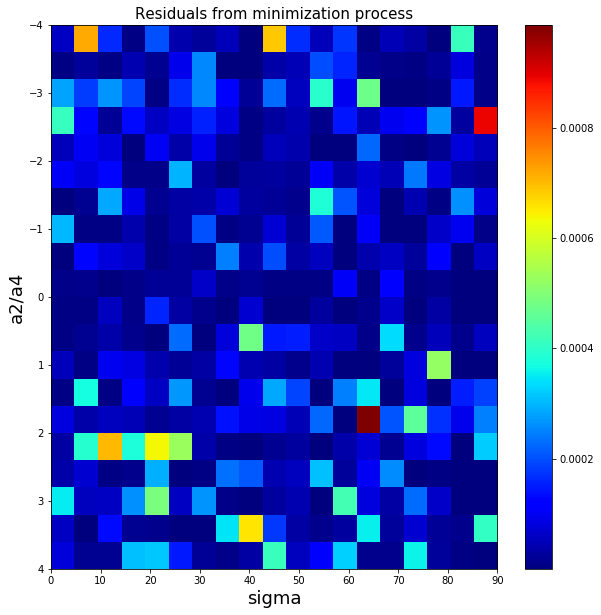

In [39]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(residualmat, cmap='jet', extent=[0, 90, 4, -4], aspect='auto')
plt.colorbar();
plt.title('Residuals from minimization process', size=15);
plt.xlabel('sigma', size=18)
plt.ylabel('a2/a4', size=18);

In [40]:
a2a4_stacked = np.zeros((len(a2a4), 19))
for i in range(0, 19):
    a2a4_stacked[:, i] = a2a4

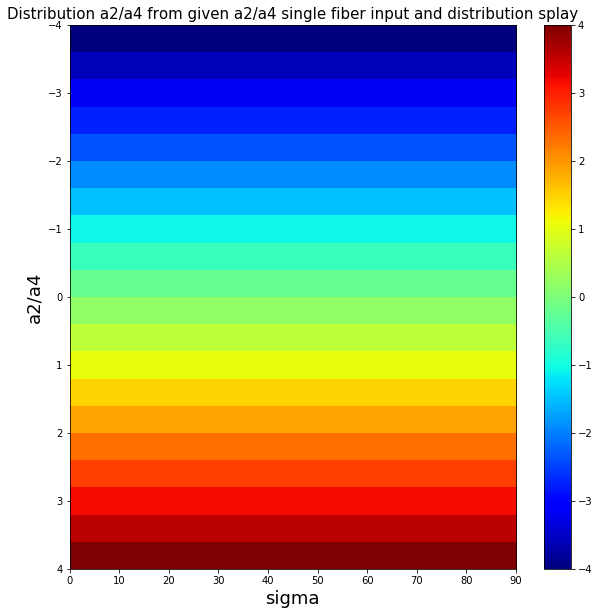

In [41]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(a2a4_stacked, cmap='jet', extent=[0, 90, 4, -4], aspect='auto')
plt.colorbar();
plt.title('Distribution a2/a4 from given a2/a4 single fiber input and distribution splay', size=15);
plt.xlabel('sigma', size=18)
plt.ylabel('a2/a4', size=18);